In [24]:
import numpy as np
from skimage import data
from skimage . color import rgb2gray
import matplotlib . pyplot as plt
from mpl_toolkits . mplot3d import Axes3D
import cv2
from tqdm import tqdm
from numba import njit
import time
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
fgt = "../teddy/disp2.png"
foccl = "../teddy/occl.png"
fdisp = "out2/Displeft4.8.png"

gt = cv2.imread(fgt, cv2.IMREAD_GRAYSCALE)
disp = cv2.imread(fdisp, cv2.IMREAD_GRAYSCALE)
occl = cv2.imread(foccl, cv2.IMREAD_GRAYSCALE)

In [119]:
from stereomatch import createDisparityMap
from skimage import io

Ig = "../teddy/im2.png"
Id = "../teddy/im6.png"

Ig = cv2.imread(Ig, cv2.IMREAD_GRAYSCALE)
Id = cv2.imread(Id, cv2.IMREAD_GRAYSCALE)

occlusionCost = 20

leftDisparityMap = np.zeros(Ig.shape, dtype='float64')
rightDisparityMap = np.zeros(Ig.shape, dtype='float64')
leftDisparityMap, rightDisparityMap = createDisparityMap(Ig, Id, occlusionCost, leftDisparityMap, rightDisparityMap)

In [121]:
np.unique(leftDisparityMap)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52.])

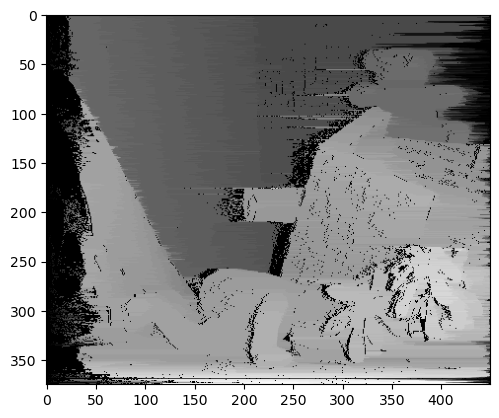

In [114]:
plt.imshow(leftDisparityMap, cmap="gray")

In [122]:
disp = cv2.normalize(leftDisparityMap, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

In [116]:
disp = mode_filter(disp, 7)

100%|████████████████████████████████████████| 375/375 [00:02<00:00, 145.00it/s]


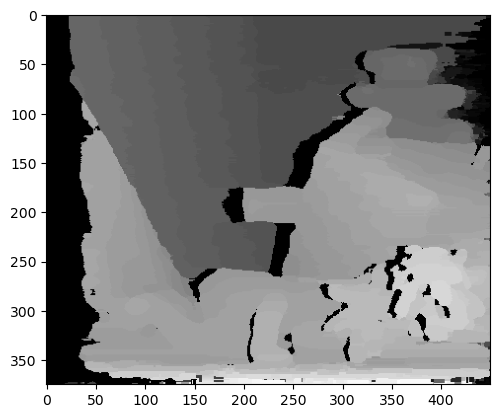

In [117]:
plt.imshow(disp, cmap="gray")

In [118]:
evaldisp(gt, occl, disp)

(6.138728425131081, 0.9030518518518519, 0.9006696296296296)

In [86]:
from scipy.ndimage import median_filter
kernel_size = 9  # Adjust the kernel size as needed
blurred_image = median_filter(disp, size=kernel_size)

In [93]:
img2 = disp.copy()
img1 = cv2.imread("../teddy_disp.png", cv2.IMREAD_GRAYSCALE)

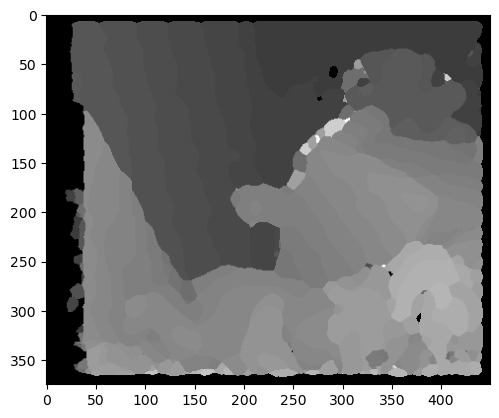

In [98]:
plt.imshow(img1, cmap="gray")

In [206]:
from stereo import stereoMatching

left, right = stereoMatching(Ig, Id)

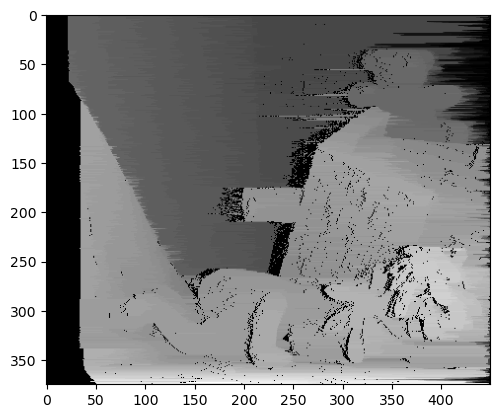

In [207]:
plt.imshow(left, cmap="gray")

In [209]:
evaldisp(gt, occl, left)

(5.167171095705759, 0.9064592592592593, 0.9019496296296297)

In [213]:
left = mode_filter(left, 11)

100%|████████████████████████████████████████| 375/375 [00:03<00:00, 119.86it/s]


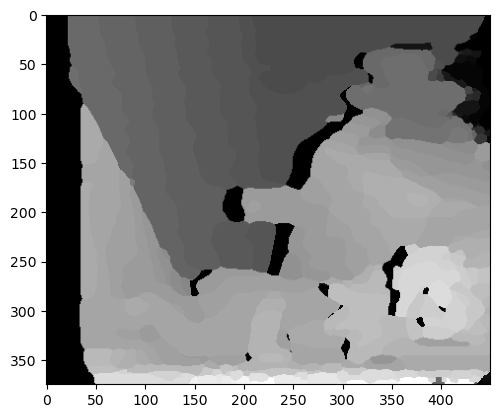

In [214]:
plt.imshow(left, cmap="gray")

In [215]:
evaldisp(gt, occl, left)

(5.04929541837983, 0.9061511111111111, 0.9022933333333333)